In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

# **1. 데이터 로드**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
data = pd.read_csv('house_data.csv')

In [6]:
data[['단지명', '매칭 구']] = data[['매칭 구', '단지명']]
data = data.rename(columns = {'단지명':'매칭 구', '매칭 구':'단지명'})
data

,매칭 구,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,단지명,건설수주_건축(단위 백만원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
0,강남구,74.66,202101,17,"245,000",7,2020,개포로,개포래미안포레스트,"10,589,107",...,57.4,"25,818","2,976.21",2.72,2.80,89.828,101.04,"1,099.03",103.8,3281.542995
1,강남구,59.92,202105,22,"198,500",18,2020,개포로,개포래미안포레스트,"11,699,841",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3312.750334
2,강남구,49.92,202105,22,"180,000",7,2020,개포로,개포래미안포레스트,"11,699,841",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3605.769231
3,강남구,59.92,202105,22,"198,500",18,2020,개포로,개포래미안포레스트,"11,699,841",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3312.750334
4,강남구,49.92,202105,22,"180,000",7,2020,개포로,개포래미안포레스트,"11,699,841",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3605.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,중구,59.74,202011,28,"104,000",5,2011,퇴계로,래미안하이베르,"13,510,590",...,60.7,"27,241","2,591.34",2.71,2.81,87.613,100.09,"1,115.20",102.6,1740.877134
7858,중구,59.74,202012,1,"102,000",5,2011,퇴계로,래미안하이베르,"22,231,493",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1707.398728
7859,중구,59.74,202012,5,"106,000",13,2011,퇴계로,래미안하이베르,"22,231,493",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1774.355541
7860,중구,84.98,202012,10,"128,000",2,2011,퇴계로,래미안하이베르,"22,231,493",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1506.236762


In [7]:
# 도로명, 단지명 column 제거


data = data.drop(['도로명', '단지명'], axis = 1)
data

,매칭 구,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
0,강남구,74.66,202101,17,"245,000",7,2020,"10,589,107","6,436,523",97.0,...,57.4,"25,818","2,976.21",2.72,2.80,89.828,101.04,"1,099.03",103.8,3281.542995
1,강남구,59.92,202105,22,"198,500",18,2020,"11,699,841","5,568,538",99.0,...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3312.750334
2,강남구,49.92,202105,22,"180,000",7,2020,"11,699,841","5,568,538",99.0,...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3605.769231
3,강남구,59.92,202105,22,"198,500",18,2020,"11,699,841","5,568,538",99.0,...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3312.750334
4,강남구,49.92,202105,22,"180,000",7,2020,"11,699,841","5,568,538",99.0,...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,3605.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,중구,59.74,202011,28,"104,000",5,2011,"13,510,590","8,663,124",96.4,...,60.7,"27,241","2,591.34",2.71,2.81,87.613,100.09,"1,115.20",102.6,1740.877134
7858,중구,59.74,202012,1,"102,000",5,2011,"22,231,493","15,138,239",96.6,...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1707.398728
7859,중구,59.74,202012,5,"106,000",13,2011,"22,231,493","15,138,239",96.6,...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1774.355541
7860,중구,84.98,202012,10,"128,000",2,2011,"22,231,493","15,138,239",96.6,...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,1506.236762


# **2. EDA**

2-1. 데이터 타입 확인 및 변환

  - 범주형 변수를 수치형으로 변환 (원핫인코딩 사용)

2-2. 결측치 처리

2-3. 이상치 처리

  - 우리는 25% 위아래로 자르기로 함

2-4. 스케일링

  - 변수들의 범위를 일치시켜주기 위해서

2-5. 다중공산성 확인을 위한 변수 선택

  - 불필요한 변수 제거 미리 하고 vif 확인해준다.

  - 파이썬의 경우 4개??

2-6. 변수 변환 (로그 변환, 제곱근 변환 등)

   - 이 경우, 타겟 값 자체가 꼬리부분이 엄청 긴 모양이 나오기 때문에 로그 변환시켜 정규분포로 만들어주었다.

**2-1. 원핫인코딩**

- 데이터 타입이 object, category 인 것들 = 범주형 변수 => 원핫인코딩

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7862 entries, 0 to 7861
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   매칭 구                                7862 non-null   object 
 1   전용면적(㎡)                             7862 non-null   float64
 2   계약년월                                7862 non-null   int64  
 3   계약일                                 7862 non-null   int64  
 4   거래금액(만원)                            7862 non-null   object 
 5   층                                   7862 non-null   int64  
 6   건축년도                                7862 non-null   int64  
 7   건설수주_건축(단위 백만원)                     7862 non-null   object 
 8   건설수주_주택(단위 백만원)                     7862 non-null   object 
 9   매매가격지수(아파트)                         7862 non-null   float64
 10  경상수지(백만불)                           7862 non-null   object 
 11  무역수지(백만불)                           7862 no

In [9]:
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)


Index(['매칭 구', '거래금액(만원)', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '경상수지(백만불)',
       '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)',
       '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'],
      dtype='object')


object = 매칭구, 거래금액(만원), 건설수주_건축(단위 백만원), 건설수주_주택(단위 백만원), 경상수지(백만불), 무역수지(백만불), 대출금액(아파트)(억원), 대출잔액(아파트)(억원), 서울_신규_분양세대(단위: 세대), 경제활동인구_취업자(단위: 천명), 국제 주요국 주가지수(KOSPI), 원화의 대위안/대엔 환율(원/달러(종가)_원



In [10]:
# object -> float 형으로 데이터타입 변환
transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7862 entries, 0 to 7861
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   매칭 구                                7862 non-null   object 
 1   전용면적(㎡)                             7862 non-null   float64
 2   계약년월                                7862 non-null   int64  
 3   계약일                                 7862 non-null   int64  
 4   거래금액(만원)                            7862 non-null   float64
 5   층                                   7862 non-null   int64  
 6   건축년도                                7862 non-null   int64  
 7   건설수주_건축(단위 백만원)                     7862 non-null   float64
 8   건설수주_주택(단위 백만원)                     7862 non-null   float64
 9   매매가격지수(아파트)                         7862 non-null   float64
 10  경상수지(백만불)                           7862 non-null   float64
 11  무역수지(백만불)                           7862 no

In [12]:
import pandas as pd



# 매칭구(object)에 대해 원핫인코딩 적용
data_encoded = pd.get_dummies(data, columns=['매칭 구'], drop_first=True)

# 결과 출력
print(data_encoded)


      전용면적(㎡)    계약년월  계약일  거래금액(만원)   층  건축년도  건설수주_건축(단위 백만원)  \
0       74.66  202101   17  245000.0   7  2020       10589107.0   
1       59.92  202105   22  198500.0  18  2020       11699841.0   
2       49.92  202105   22  180000.0   7  2020       11699841.0   
3       59.92  202105   22  198500.0  18  2020       11699841.0   
4       49.92  202105   22  180000.0   7  2020       11699841.0   
...       ...     ...  ...       ...  ..   ...              ...   
7857    59.74  202011   28  104000.0   5  2011       13510590.0   
7858    59.74  202012    1  102000.0   5  2011       22231493.0   
7859    59.74  202012    5  106000.0  13  2011       22231493.0   
7860    84.98  202012   10  128000.0   2  2011       22231493.0   
7861    84.97  202012   16  126500.0  10  2011       22231493.0   

      건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  ...  매칭 구_마포구  매칭 구_서대문구  \
0           6436523.0         97.0     5762.0  ...         0          0   
1           5568538.0         99.0    11307.0

**2-2. 결측치 확인**

In [13]:
data = data_encoded

In [14]:
missing_values = data.isnull().sum()

# 결과 출력
print(missing_values)

전용면적(㎡)                                 0
계약년월                                    0
계약일                                     0
거래금액(만원)                                0
층                                       0
건축년도                                    0
건설수주_건축(단위 백만원)                         0
건설수주_주택(단위 백만원)                         0
매매가격지수(아파트)                             0
경상수지(백만불)                               0
무역수지(백만불)                               0
대출금액(아파트)(억원)                           0
대출잔액(아파트)(억원)                           0
서울_신규_분양세대(단위: 세대)                      0
아파트 동(호)수_(단위: 호)                       0
아파트 건물면적_(천)                          107
생산자물가지수 총지수                             0
전규모(1인이상) 전체임금총액[원]                     0
소비자물가지수 총지수                             0
소비자물가지수 주택, 수도, 전기 및 연료                 0
가계대출 (연리%)                              0
경기종합지수(2020=100)                        0
경제활동인구_ 실업률(단위: %)                      0
경제활동인구_고용률(단위: %)                 

**2-3. 이상치 제거**

In [15]:
import pandas as pd

df = pd.DataFrame(data)

# 이상치 확인
Q1 = df['평당가'].quantile(0.25)
Q3 = df['평당가'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치 식별
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['평당가'] < lower_bound) | (df['평당가'] > upper_bound)

# 이상치를 제외한 데이터프레임 생성
filtered_df = df[~outliers]

# 결과 출력
print(filtered_df)


      전용면적(㎡)    계약년월  계약일  거래금액(만원)   층  건축년도  건설수주_건축(단위 백만원)  \
26     84.943  202102   15  251000.0   1  2019       10479357.0   
71    110.390  202104   30  285000.0  10  1989       14183240.0   
72    110.390  202105   26  300000.0  13  1989       11699841.0   
73    110.390  202108   10  300000.0  16  1989       13557522.0   
74    106.390  202103    5  280000.0  13  2016       13259062.0   
...       ...     ...  ...       ...  ..   ...              ...   
7857   59.740  202011   28  104000.0   5  2011       13510590.0   
7858   59.740  202012    1  102000.0   5  2011       22231493.0   
7859   59.740  202012    5  106000.0  13  2011       22231493.0   
7860   84.980  202012   10  128000.0   2  2011       22231493.0   
7861   84.970  202012   16  126500.0  10  2011       22231493.0   

      건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  ...  매칭 구_마포구  매칭 구_서대문구  \
26          5379397.0         97.7     6520.0  ...         0          0   
71          8377800.0         98.6      518.0

In [16]:
data = filtered_df

**2-4. 스케일링**

- min-max scaling 진행 (매칭구 / 타겟변수 제외한 모든 column들에 대해서)

In [17]:
column_names = data.columns
print(column_names)

Index(['전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도', '건설수주_건축(단위 백만원)',
       '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)',
       '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)',
       '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', '평당가', '매칭 구_강동구',
       '매칭 구_강북구', '매칭 구_광진구', '매칭 구_구로구', '매칭 구_노원구', '매칭 구_동대문구', '매칭 구_동작구',
       '매칭 구_마포구', '매칭 구_서대문구', '매칭 구_서초구', '매칭 구_성동구', '매칭 구_성북구', '매칭 구_송파구',
       '매칭 구_영등포구', '매칭 구_용산구', '매칭 구_은평구', '매칭 구_중구'],
      dtype='object')


In [18]:
from sklearn.preprocessing import MinMaxScaler

# 연속형 변수 선택
continuous_columns = ['전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도', '건설수주_건축(단위 백만원)',
       '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)',
       '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)',
       '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수']

# 숫자열에 있는 쉼표(,) 제거하고 숫자로 변환
df[continuous_columns] = df[continuous_columns].replace({',': ''}, regex=True).astype(float)

# 연속형 변수에 대해 Min-Max Scaling 적용
scaler = MinMaxScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# 결과 출력
print(df)


       전용면적(㎡)      계약년월       계약일  거래금액(만원)         층      건축년도  \
0     0.220526  0.473934  0.533333  0.262884  0.133333  0.977273   
1     0.142947  0.492891  0.700000  0.205278  0.377778  0.977273   
2     0.090316  0.492891  0.700000  0.182359  0.133333  0.977273   
3     0.142947  0.492891  0.700000  0.205278  0.377778  0.977273   
4     0.090316  0.492891  0.700000  0.182359  0.133333  0.977273   
...        ...       ...       ...       ...       ...       ...   
7857  0.142000  0.047393  0.900000  0.088206  0.088889  0.772727   
7858  0.142000  0.052133  0.000000  0.085728  0.088889  0.772727   
7859  0.142000  0.052133  0.133333  0.090684  0.266667  0.772727   
7860  0.274842  0.052133  0.300000  0.117939  0.022222  0.772727   
7861  0.274789  0.052133  0.500000  0.116080  0.200000  0.772727   

      건설수주_건축(단위 백만원)  건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  ...  매칭 구_마포구  \
0            0.240076         0.223136     0.281553   0.608317  ...         0   
1            0.312576

**2-5. vif 전 변수 걸러내기**

**2-6. 타겟변수 (평당가) 분석**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

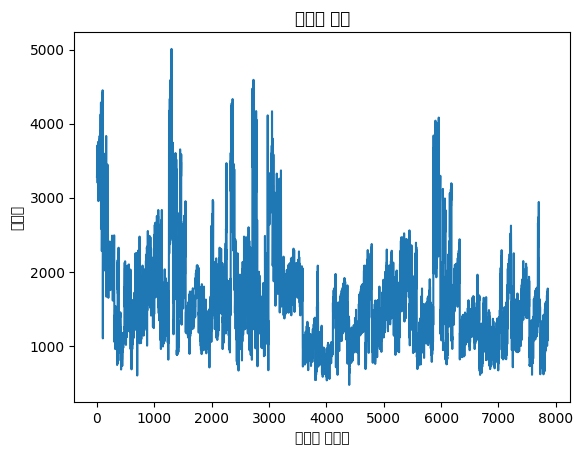

In [19]:
import matplotlib.pyplot as plt

# 평당가 열 선택
price_per_area = df['평당가']

# 그래프 그리기
plt.plot(price_per_area)
plt.title('평당가 변화')
plt.xlabel('데이터 포인트')
plt.ylabel('평당가')
plt.show()


로그 변환시켜서 타겟 변수 또한 정규분포에 가깝게 만들어준다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


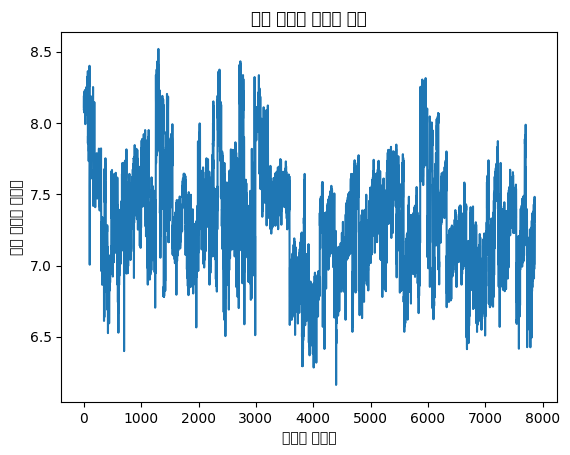

In [20]:
import numpy as np

# 로그 변환
log_price_per_area = np.log1p(price_per_area)

# 그래프 그리기
plt.plot(log_price_per_area)
plt.title('로그 변환된 평당가 변화')
plt.xlabel('데이터 포인트')
plt.ylabel('로그 변환된 평당가')
plt.show()


근데 먼가 의미없어보임....

# **3. VIF (다중공산성) 확인**

- vif : 분산 팽창 요인

- 각 독립 변수가 다른 독립 변수들가 얼마나 강한 상관 관계를 가지는지 측정

In [21]:
column_names = df.columns
print(column_names)

Index(['전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도', '건설수주_건축(단위 백만원)',
       '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)',
       '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)',
       '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', '평당가', '매칭 구_강동구',
       '매칭 구_강북구', '매칭 구_광진구', '매칭 구_구로구', '매칭 구_노원구', '매칭 구_동대문구', '매칭 구_동작구',
       '매칭 구_마포구', '매칭 구_서대문구', '매칭 구_서초구', '매칭 구_성동구', '매칭 구_성북구', '매칭 구_송파구',
       '매칭 구_영등포구', '매칭 구_용산구', '매칭 구_은평구', '매칭 구_중구'],
      dtype='object')


In [22]:
df_selected.isnull().sum()


NameError: ignored

아파트 건물면적에 107개 NaN 값있어서 평균으로 대체

In [32]:
df.describe()

,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),...,매칭 구_마포구,매칭 구_서대문구,매칭 구_서초구,매칭 구_성동구,매칭 구_성북구,매칭 구_송파구,매칭 구_영등포구,매칭 구_용산구,매칭 구_은평구,매칭 구_중구
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,...,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,0.261126,0.246141,0.490791,0.125744,0.222903,0.726524,0.402616,0.373241,0.306928,0.675461,...,0.139914,0.073264,0.071483,0.029127,0.091707,0.033198,0.049097,0.005088,0.004833,0.008522
std,0.129658,0.303973,0.284900,0.086822,0.155428,0.149914,0.234589,0.222531,0.310334,0.214931,...,0.346919,0.260586,0.257646,0.168174,0.288630,0.179164,0.216084,0.071151,0.069359,0.091926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.143211,0.023697,0.266667,0.070862,0.088889,0.613636,0.240076,0.234581,0.019417,0.645801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.274053,0.042654,0.500000,0.107408,0.200000,0.750000,0.357284,0.382739,0.203883,0.687698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.274842,0.492891,0.733333,0.144915,0.311111,0.840909,0.547543,0.438056,0.475728,0.841300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# 특정 열의 평균값 계산
column_name = '아파트 건물면적_(천)'  # 대체할 열의 이름으로 변경
mean_value = df[column_name].mean()

# NaN 값에 평균값 대체
df[column_name].fillna(mean_value, inplace=True)


In [24]:
df1 = df
df2 = df

In [27]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터프레임에서 불필요한 변수 제거
selected_columns = ['전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도', '건설수주_건축(단위 백만원)',
       '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)',
       '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)',
       '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수']  # 분석에 필요한 변수들을 선택
df1_selected = df1[selected_columns]

# VIF 계산
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data.replace([np.inf, -np.inf], np.nan).dropna()

vif_result = calculate_vif(df1_selected)



# VIF가 높은 변수 확인
high_vif_variables = vif_result[vif_result['VIF'] > 5]['Variable'].tolist()
print(f'다중공산성이 높은 변수: {high_vif_variables}')

# 불필요한 변수 제거
df1_final = df1_selected.drop(columns=high_vif_variables, axis=1)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


다중공산성이 높은 변수: ['전용면적(㎡)', '계약년월', '거래금액(만원)', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']


In [28]:
df1_final

,계약일,층,소비자물가지수 총지수,경기종합지수(2020=100),소비자물가지수_총지수(가중치:1000?),경기종합지수
0,0.533333,0.133333,0.162602,0.482456,0.162602,0.482456
1,0.700000,0.377778,0.265244,0.701754,0.265244,0.701754
2,0.700000,0.133333,0.265244,0.701754,0.265244,0.701754
3,0.700000,0.377778,0.265244,0.701754,0.265244,0.701754
4,0.700000,0.133333,0.265244,0.701754,0.265244,0.701754
...,...,...,...,...,...,...
7857,0.900000,0.088889,0.066057,0.377193,0.066057,0.377193
7858,0.000000,0.088889,0.090447,0.421053,0.090447,0.421053
7859,0.133333,0.266667,0.090447,0.421053,0.090447,0.421053
7860,0.300000,0.022222,0.090447,0.421053,0.090447,0.421053


이제 vif 로 걸러진 데이터프레임에

매칭구 (원핫인코딩) + 평당가 (타겟변수) 추가한 최종 데이터프레임 만든다.

In [29]:
# DataFrame에 새로운 열 추가
add = ['평당가', '매칭 구_강동구',
       '매칭 구_강북구', '매칭 구_광진구', '매칭 구_구로구', '매칭 구_노원구', '매칭 구_동대문구', '매칭 구_동작구',
       '매칭 구_마포구', '매칭 구_서대문구', '매칭 구_서초구', '매칭 구_성동구', '매칭 구_성북구', '매칭 구_송파구',
       '매칭 구_영등포구', '매칭 구_용산구', '매칭 구_은평구', '매칭 구_중구']

df_combined = pd.concat([df1_final, df2[add]], axis=1)

# 합쳐진 데이터프레임 확인
print(df_combined)

           계약일         층  소비자물가지수 총지수   경기종합지수(2020=100)  \
0     0.533333  0.133333      0.162602          0.482456   
1     0.700000  0.377778      0.265244          0.701754   
2     0.700000  0.133333      0.265244          0.701754   
3     0.700000  0.377778      0.265244          0.701754   
4     0.700000  0.133333      0.265244          0.701754   
...        ...       ...           ...               ...   
7857  0.900000  0.088889      0.066057          0.377193   
7858  0.000000  0.088889      0.090447          0.421053   
7859  0.133333  0.266667      0.090447          0.421053   
7860  0.300000  0.022222      0.090447          0.421053   
7861  0.500000  0.200000      0.090447          0.421053   

      소비자물가지수_총지수(가중치:1000?)    경기종합지수          평당가  매칭 구_강동구  매칭 구_강북구  \
0                   0.162602  0.482456  3281.542995         0         0   
1                   0.265244  0.701754  3312.750334         0         0   
2                   0.265244  0.701754  3605.769231   

In [31]:
data = df_combined

In [33]:
column_names = data.columns
print(column_names)

Index(['계약일', '층', '소비자물가지수 총지수 ', '경기종합지수(2020=100)',
       '소비자물가지수_총지수(가중치:1000?)', '경기종합지수', '평당가', '매칭 구_강동구', '매칭 구_강북구',
       '매칭 구_광진구', '매칭 구_구로구', '매칭 구_노원구', '매칭 구_동대문구', '매칭 구_동작구', '매칭 구_마포구',
       '매칭 구_서대문구', '매칭 구_서초구', '매칭 구_성동구', '매칭 구_성북구', '매칭 구_송파구',
       '매칭 구_영등포구', '매칭 구_용산구', '매칭 구_은평구', '매칭 구_중구'],
      dtype='object')


# **4. 모델 학습**

아파트 평당가 예측은 회귀 문제

-> MSE, R^2 값으로만 모델의 성능 평가

분류 문제일때 예측도 (%) 로 성능을 평가함

**R-squared 값이 0.7 이상이면 좋은 성능으로 판단**

**cross validation**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [40]:
from sklearn.model_selection import train_test_split

# features와 target 정의
features = data[[ '계약일', '층', '소비자물가지수 총지수 ', '경기종합지수(2020=100)',
       '소비자물가지수_총지수(가중치:1000?)', '경기종합지수', '매칭 구_강동구', '매칭 구_강북구',
       '매칭 구_광진구', '매칭 구_구로구', '매칭 구_노원구', '매칭 구_동대문구', '매칭 구_동작구', '매칭 구_마포구',
       '매칭 구_서대문구', '매칭 구_서초구', '매칭 구_성동구', '매칭 구_성북구', '매칭 구_송파구',
       '매칭 구_영등포구', '매칭 구_용산구', '매칭 구_은평구', '매칭 구_중구' ]]

target = data['평당가']

# 전체 데이터를 train/validation과 test로 나누기
X_train_valid, X_test, y_train_valid, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 다시 train과 validation으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

**4-1. 랜덤 포레스트**

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'n_estimators': [200],  # 트리 개수 - 우리가 쓴 데이터의 경우 중간 규모이므로 1000보다 큰 걸 쓰는 게 일반적으론 권장됨
                                  # 보통 100, 200 부터 증가시키면서 성능이 최대일 때 멈춤.
    'max_depth': [10, 1, 0.1], # esimator 빼고 나머지 3개는 로그 스케일로 확인하는 게 좋음. -> 로그 단위의 1, 2, 3 이렇게가 공평해서
    'min_samples_split': [0.1, 1, 10, 100],
    'min_samples_leaf': [0.001]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2)

# 그리드 서치 수행
grid_search.fit(X_train_valid, y_train_valid)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델을 얻어옴
best_rf_model = grid_search.best_estimator_

# 검증 데이터에 대한 평가 (MSE)
y_valid_pred = best_rf_model.predict(X_valid)
mse = mean_squared_error(y_valid, y_valid_pred)
print(f'Mean Squared Error on Validation Data: {mse}')

# 교차 검증을 통한 모델 평가
cv_scores = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Mean Squared Error with Cross-Validation: {cv_mse}')



# 검증 데이터에 대한 평가 (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Validation Data: {rmse}')

# 교차 검증을 통한 모델 평가 (RMSE)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f'Root Mean Squared Error with Cross-Validation: {cv_rmse}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=0.1, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=0.1, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=0.1, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=0.1, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=0.1, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=0.001, min_samples_split=1, n_estimators=200; tot

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 0.001, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error on Validation Data: 202229.48742359344
Mean Squared Error with Cross-Validation: 223631.7977266001
Root Mean Squared Error on Validation Data: 449.6993300235096
Root Mean Squared Error with Cross-Validation: 472.89723801963584


In [50]:
from sklearn.metrics import r2_score, explained_variance_score

# 최적의 모델을 얻어옴
best_rf_model = grid_search.best_estimator_

# 검증 데이터에 대한 평가 (R^2)
y_valid_pred = best_rf_model.predict(X_valid)
r2 = r2_score(y_valid, y_valid_pred)
print(f'R^2 on Validation Data: {r2}')

# 교차 검증을 통한 모델 평가 (R^2)
cv_scores_r2 = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='r2')
cv_r2 = cv_scores_r2.mean()
print(f'R^2 with Cross-Validation: {cv_r2}')

# 검증 데이터에 대한 평가 (Explained Variance)
explained_var = explained_variance_score(y_valid, y_valid_pred)
print(f'Explained Variance on Validation Data: {explained_var}')

# 교차 검증을 통한 모델 평가 (Explained Variance)
cv_scores_explained_var = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='explained_variance')
cv_explained_var = cv_scores_explained_var.mean()
print(f'Explained Variance with Cross-Validation: {cv_explained_var}')


R^2 on Validation Data: 0.5572166952332855
R^2 with Cross-Validation: 0.5064140894988837
Explained Variance on Validation Data: 0.5572474777498054
Explained Variance with Cross-Validation: 0.5076458427788161


과적합 해결을 위해 '규제' 적용

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [0.1, 1, 10],
    'min_samples_split': [0.1, 1, 10],
    'min_samples_leaf': [0.01, 0.1, 1],
    'max_features': ['sqrt', 'log2']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2)

# 그리드 서치 수행
grid_search.fit(X_train_valid, y_train_valid)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델을 얻어옴
best_rf_model = grid_search.best_estimator_

# 검증 데이터에 대한 평가 (MSE)
y_valid_pred = best_rf_model.predict(X_valid)
mse = mean_squared_error(y_valid, y_valid_pred)
print(f'Mean Squared Error on Validation Data: {mse}')

# 교차 검증을 통한 모델 평가
cv_scores = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Mean Squared Error with Cross-Validation: {cv_mse}')

# 검증 데이터에 대한 평가 (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Validation Data: {rmse}')

# 교차 검증을 통한 모델 평가 (RMSE)
cv_rmse = np.sqrt(-cv_scores.mean())
print(f'Root Mean Squared Error with Cross-Validation: {cv_rmse}')

# 검증 데이터에 대한 평가 (R-squared)
r2 = r2_score(y_valid, y_valid_pred)
print(f'R^2 on Validation Data: {r2}')

# 교차 검증을 통한 모델 평가 (R-squared)
cv_r2_scores = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()
print(f'R^2 with Cross-Validation: {cv_r2}')

# 검증 데이터에 대한 평가 (Explained Variance)
explained_variance = explained_variance_score(y_valid, y_valid_pred)
print(f'Explained Variance on Validation Data: {explained_variance}')

# 교차 검증을 통한 모델 평가 (Explained Variance)
cv_explained_variance_scores = cross_val_score(best_rf_model, X_train_valid, y_train_valid, cv=5, scoring='explained_variance')
cv_explained_variance = cv_explained_variance_scores.mean()
print(f'Explained Variance with Cross-Validation: {cv_explained_variance}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=100; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=100; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=100; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=100; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=100; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=200; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_leaf=0.01, min_samples_split=0.1, n_estimators=200; total time=   0.0s
[CV] END max_depth=0.1, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error on Validation Data: 215583.6493371964
Mean Squared Error with Cross-Validation: 237995.87957826303
Root Mean Squared Error on Validation Data: 464.3098634933318
Root Mean Squared Error with Cross-Validation: 487.8482136671846
R^2 on Validation Data: 0.5279776360840654
R^2 with Cross-Validation: 0.47676175198179493
Explained Variance on Validation Data: 0.5279803628718416
Explained Variance with Cross-Validation: 0.47806451101396413


**2-2. XGBoost**

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


# 특성(X)과 타겟 변수(y) 선택
# 특성: 예측에 사용되는 변수들
# 타겟 변수: 예측하려는 변수
X = data.drop('평당가', axis=1)
y = data['평당가']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = XGBRegressor()

# GridSearchCV를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.1, 1, 10],
    'max_depth': [0.1, 1, 10],
    'min_child_weight': [0.001, 0.1, 1]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'최적의 하이퍼파라미터: {best_params}')

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 세트 예측
y_pred = best_model.predict(X_test)

# 모델 평가 - 평균제곱오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 모델 평가 - 평균제곱근오차(RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 모델 평가 - 결정계수(R^2)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# 예측 결과 확인
result_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})

print(result_df)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

최적의 하이퍼파라미터: {'learning_rate': 1, 'max_depth': 1, 'min_child_weight': 0.001, 'n_estimators': 500}
Mean Squared Error (MSE): 185280.70457002227
Root Mean Squared Error (RMSE): 430.44245210018755
R^2 Score: 0.5922330141728913
              실제값          예측값
1242  1709.401709  1479.451294
1407   941.332450  2752.542480
2579  1296.488369  1745.490234
1075  1663.306452  1747.535767
5448  2559.800953  1840.359375
...           ...          ...
196   1861.012956  1894.175293
4466   937.692782  1168.202393
3515  2114.701404  2455.581055
415   1012.658228  1265.742065
2571  1426.459076  1832.117432

[1573 rows x 2 columns]


**2-3. SVR**

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 특성(X)과 타겟 변수(y) 선택
X = data.drop('평당가', axis=1)
y = data['평당가']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성 (SVR로 변경)
model = SVR()

# GridSearchCV를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'최적의 하이퍼파라미터: {best_params}')

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 세트 예측
y_pred = best_model.predict(X_test)

# 모델 평가 - 평균제곱오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 모델 평가 - 평균제곱근오차(RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 모델 평가 - 결정계수(R^2)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# 예측 결과 확인
result_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})

print(result_df)


최적의 하이퍼파라미터: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Mean Squared Error (MSE): 228598.25506810693
Root Mean Squared Error (RMSE): 478.11949873238484
R^2 Score: 0.4968994658629966
              실제값          예측값
1242  1709.401709  1555.050103
1407   941.332450  2362.030475
2579  1296.488369  1608.568250
1075  1663.306452  1875.330196
5448  2559.800953  1889.374792
...           ...          ...
196   1861.012956  1972.619401
4466   937.692782  1138.652477
3515  2114.701404  2120.039531
415   1012.658228  1257.431899
2571  1426.459076  1621.658576

[1573 rows x 2 columns]


**2-4. 앙상블 모델**

모델의 복잡성을 줄이기 위해 사용하므로 랜덤 포레스트 + 그래디언트 부스팅으로 만듦

 + 가장 성능이 좋았던 XGBoost

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# 데이터를 특성(X)과 타겟 변수(y)로 나누기
X = data.drop('평당가', axis=1)
y = data['평당가']

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# XGBoost 모델 생성
xgb_model = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)

# Gradient Boosting 모델 생성
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# 앙상블 모델 생성
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)])

# 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = ensemble_model.predict(X_test)

# 모델 평가 - 평균제곱오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 모델 평가 - 평균제곱근오차(RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 모델 평가 - 결정계수(R^2)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# 예측 결과 확인
result_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
print(result_df)


Mean Squared Error (MSE): 202211.53081939433
Root Mean Squared Error (RMSE): 449.67936445804844
R^2 Score: 0.5549715410837721
              실제값          예측값
1242  1709.401709  1611.540184
1407   941.332450  2536.158796
2579  1296.488369  1604.027137
1075  1663.306452  1993.519287
5448  2559.800953  1978.737139
...           ...          ...
196   1861.012956  2057.047211
4466   937.692782  1296.466231
3515  2114.701404  2162.316404
415   1012.658228  1425.361424
2571  1426.459076  1861.319816

[1573 rows x 2 columns]
